In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans


In [ ]:
df = pd.read_csv('data\Live.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [7]:
df.drop(columns=['Column1','Column2','Column3','Column4','status_id', 'status_published'], inplace=True)

In [8]:
# split data into X and y
X = df.drop('status_type', axis=1)
y= df['status_type']


In [9]:
label = LabelEncoder()
y = label.fit_transform(y)

In [10]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [11]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=42)

In [12]:
kmeans.cluster_centers_

array([[0.02483047, 0.00932759, 0.00889636, 0.02254048, 0.01423501,
        0.00215728, 0.00331136, 0.00441161, 0.00279261],
       [0.35566655, 0.02806954, 0.04734731, 0.34084022, 0.08499512,
        0.03631548, 0.01879727, 0.00945925, 0.01461694]])

In [13]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [14]:
kmeans.inertia_

99.50082638379907

In [16]:
from sklearn.metrics import silhouette_score

silhouette_score(X,kmeans.labels_)

np.float64(0.8125263296259583)

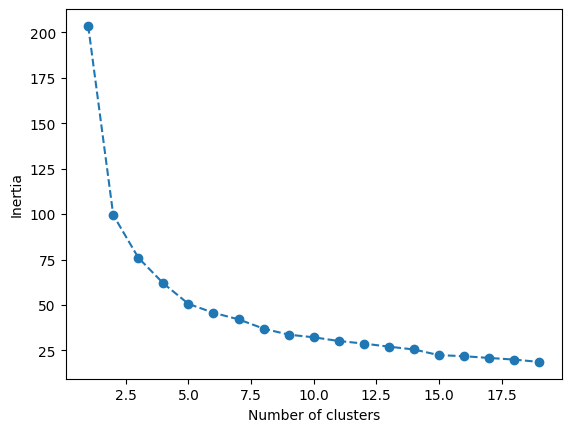

In [20]:
inertia =[]
for k in range(1,20):
  kmeans = KMeans(n_clusters = k, random_state = 42)
  kmeans.fit(X)
  inertia.append(kmeans.inertia_)
 
plt.plot(range(1,20),inertia,marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [22]:
kmeasn2 = KMeans(n_clusters=3, random_state=73)
kmeasn2.fit(X)
labels = kmeasn2.labels_

correct_labels = sum(y == labels)

print("Result %d out of %d samples corectly labelled" % (correct_labels, y.size))

print('Accuracy score: ', format(correct_labels/float(y.size)))

Result 4145 out of 7050 samples corectly labelled
Accuracy score:  0.5879432624113475
